<a href="https://colab.research.google.com/github/anij31/ml-notebooks/blob/main/california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload the dataset from local into Colab sessio

In [2]:
# Import pandas for dataframes
import pandas as pd

In [3]:
# Convert csv to pandas dataframe

df = pd.read_csv('housing.csv')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# Get info in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# shape
df.shape

(20640, 10)

### Observation 1:
- total_bedrooms column is missing values
- All columns are numerical, except ocean_proximity being categorical

###### Action:
- Explore ocean_proximity column to extract different categories.

In [9]:
# Get the different categories and their counts in ocean proximity
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
# Get crude descriptive stats of df
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


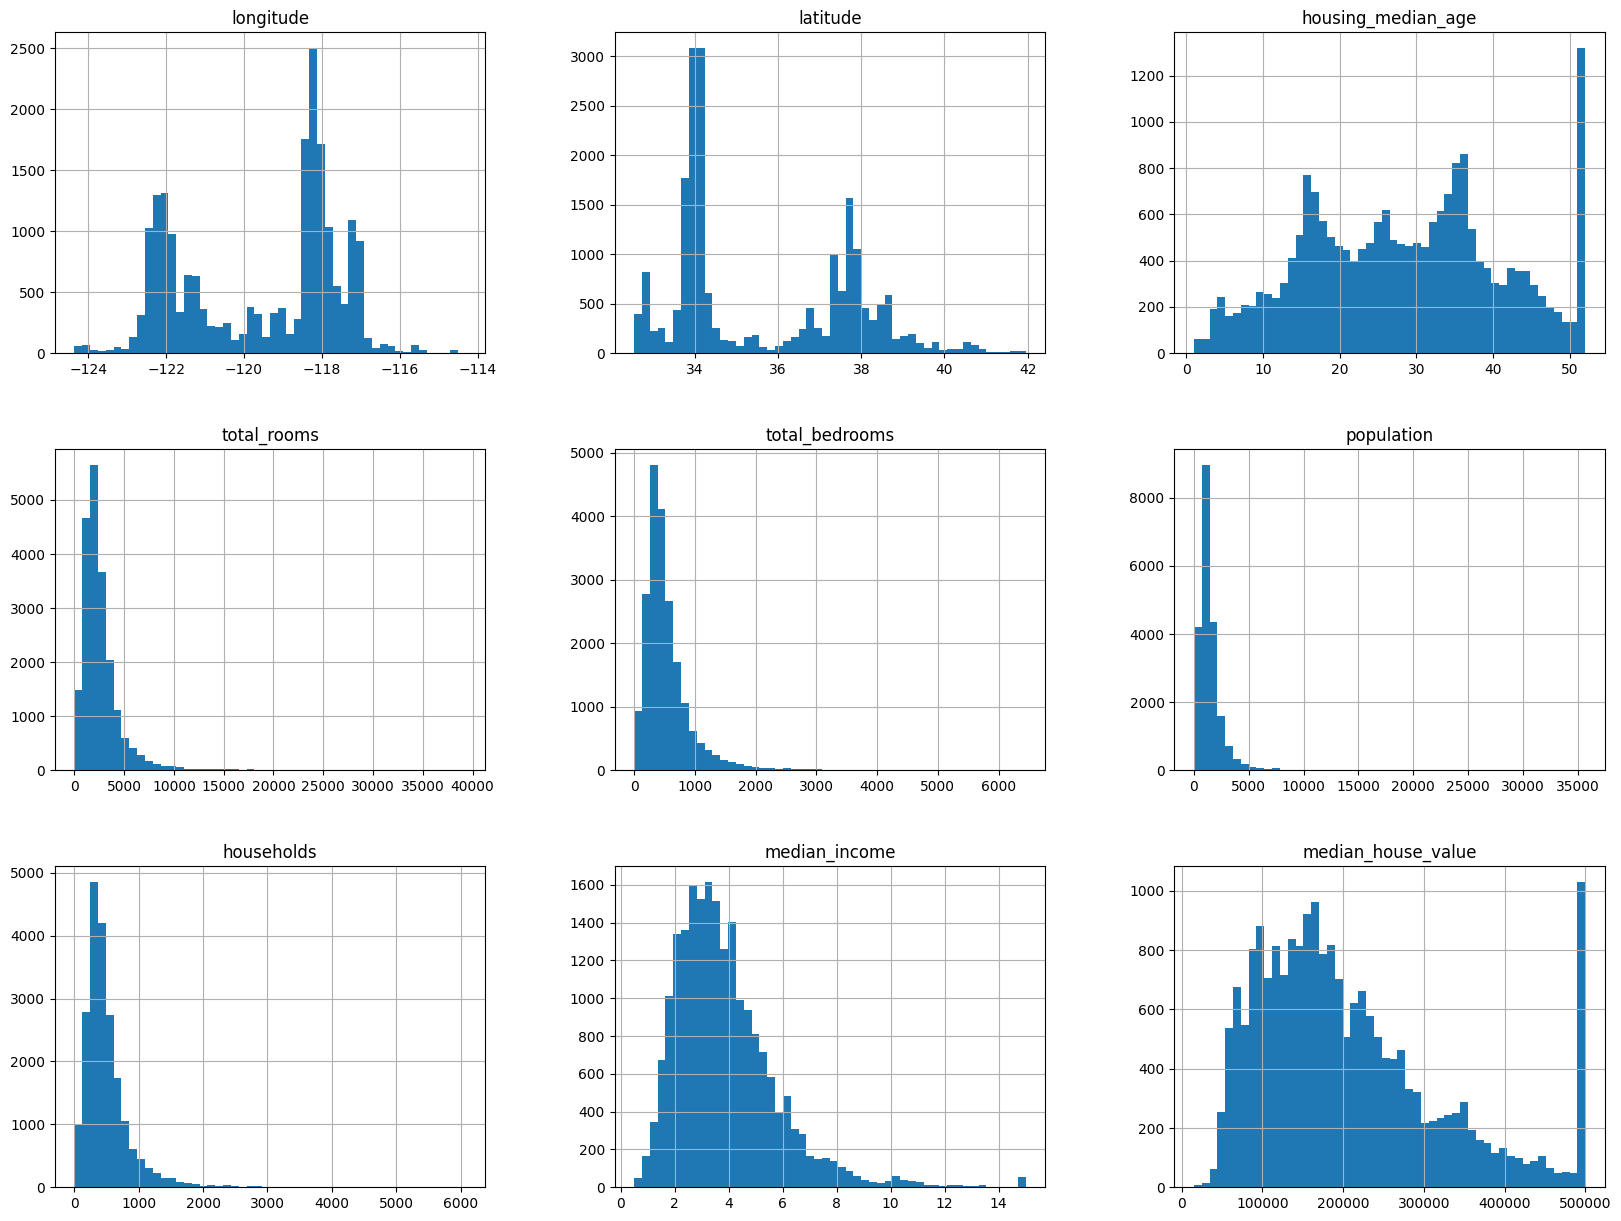

In [11]:
# Get histograms for each column
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

### Observation 2:
- Tail-heavy distributions
- Median income capped at 1600. This is scaled data. Here 1 scale unit = 1000 USD
- Median house value capped at USD 500_000

###### Action
- Come back to scaling later and distribution modification later

In [12]:
# Correlation study between features and median price
corr_matrix = df.corr(numeric_only=True)
corr_with_target = corr_matrix['median_house_value'].sort_values(ascending=False)
corr_with_target

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


### Observation 3:
- median_income looks ranks highest as the strongest predictor of median_house_value

###### Action
- Visualize (scatter plot)

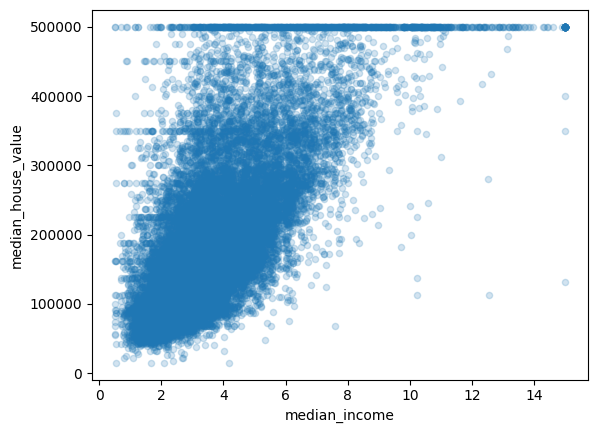

In [14]:
# Visualize for corr
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)
plt.show()

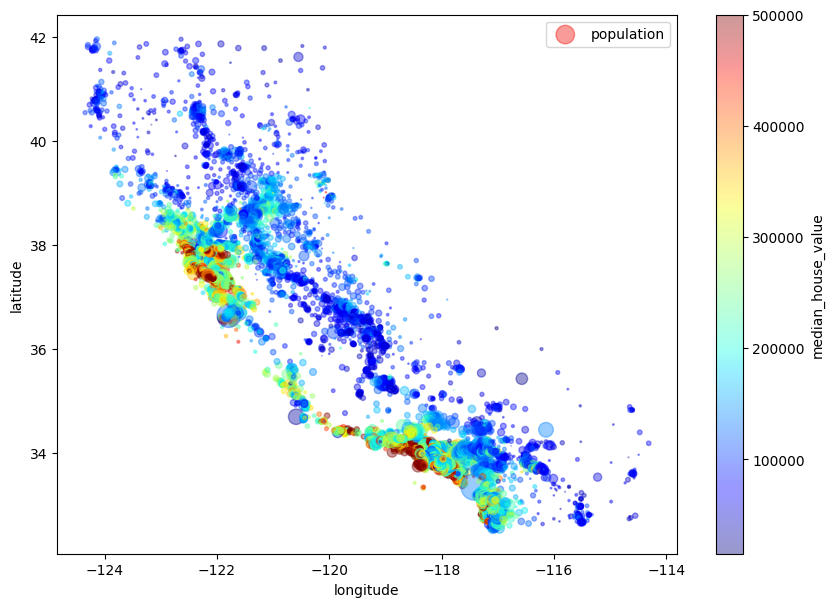

In [19]:
# Location effect?
df.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.4, s=df["population"]/100,
             label="population", c="median_house_value",
             cmap="jet", colorbar=True, figsize=(10,7))
plt.show()

### Observation 4:
- Location is non-linearly predicting median house price
- Centered hot around Bay Area and Los Angeles

###### Action
- Do a Mutual Info test

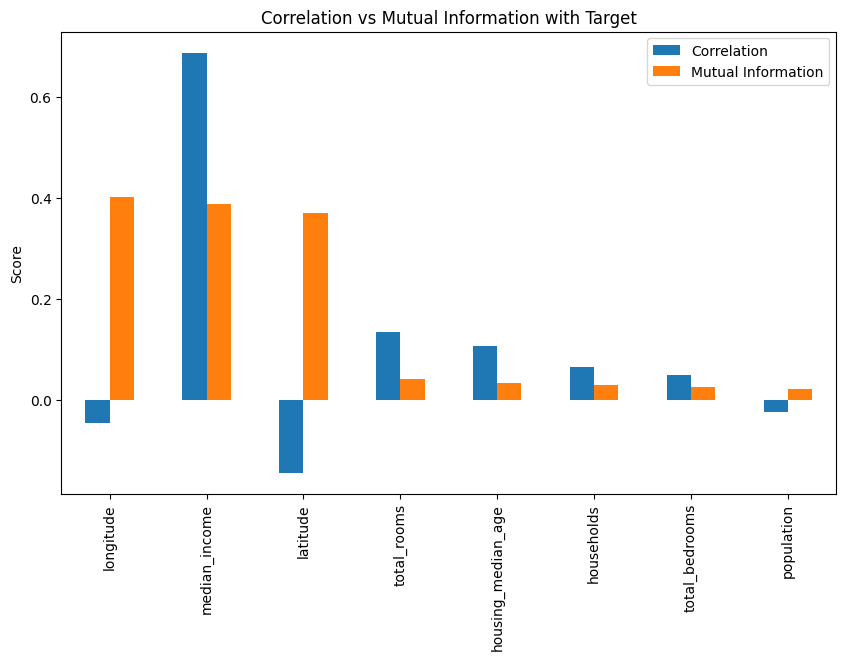

In [21]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']

X = X.fillna(X.median())

corr = X.corrwith(y)

mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns)

compare_df = pd.DataFrame({
    "Correlation": corr,
    "Mutual Information" : mi_series
}).sort_values("Mutual Information", ascending=False)


compare_df.plot(kind="bar", figsize=(10,6))
plt.title("Correlation vs Mutual Information with Target")
plt.ylabel("Score")
plt.show()